In [411]:
import numpy as np
import math
import os
import glob
import pandas as pd
from pylab import *
from netCDF4 import Dataset
import pylab as pl
from mpl_toolkits.basemap import Basemap,shiftgrid,cm
import matplotlib.cm as cm
from scipy.stats import f as scist

import numpy
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
% matplotlib inline

In [412]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

x = np.linspace(0,4,50)
y = func(x, 2.5, 1.3, 0.5)
yn = y + 0.2*np.random.normal(size=len(x))

popt, pcov = curve_fit(func, x, yn)

#Fitting the part. Th

In [414]:
import glob,csv
nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/data/findk/All_Arctic-data/WLS/Th/*.csv'))
print len(nc_filename)
print("found *.csv file: \n{}".format(nc_filename))

20
found *.csv file: 
['/ocean/xiaoxiny/research/data/findk/All_Arctic-data/WLS/Th/1_ref5.csv', '/ocean/xiaoxiny/research/data/findk/All_Arctic-data/WLS/Th/23_1.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/findk/All_Arctic-data/WLS/Th/23_2.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/findk/All_Arctic-data/WLS/Th/23_3.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/findk/All_Arctic-data/WLS/Th/23_4.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/findk/All_Arctic-data/WLS/Th/60changed.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/findk/All_Arctic-data/WLS/Th/60changed2.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/findk/All_Arctic-data/WLS/Th/60changed3.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiao

In [415]:
file_num=12
marker=['>','o','o','o','o','s','s','s','s','s','s','^']

WLS_err1=np.empty([file_num,1])
WLS_coef1=np.empty([file_num,1])
WLS_errc=np.empty([file_num,1])
WLS_coefc=np.empty([file_num,1])
sinking_rate=np.empty([file_num,1])

err1=np.empty([file_num,1])
err2=np.empty([file_num,1])

rss1=np.empty([file_num,1])
rss2=np.empty([file_num,1])


1983 CESAR
df:(1,3)
F ratio: 1.45376188161
ftest:0.314348230074
sinking   :5.549915e+02,error:2.569457e+02

1987 ARKIV/3 Stn1
df:(1,6)
F ratio: 0.76229878204
ftest:0.416180009339
sinking   :6.292958e+02,error:1.710383e+02

1987 ARKIV/3 Stn2
df:(1,5)
F ratio: 6.94920648679
ftest:0.0461906384747
sinking   :7.788012e+02,error:1.133520e+02

1987 ARKIV/3 Stn3
df:(1,5)
F ratio: 0.185375137613
ftest:0.684721811534
sinking   :2.284856e+02,error:3.138810e+01

1987 ARKIV/3 Stn4
df:(1,3)
F ratio: 0.0325892600418
ftest:0.868246922834
sinking   :3.100174e+02,error:1.133560e+02

1991 ARCTIC EXPEDITION Stn1
df:(1,3)
F ratio: 15.0259124852
ftest:0.030398109883
sinking   :1.267868e+03,error:3.080177e+02

1991 ARCTIC EXPEDITION Stn2
df:(1,2)
F ratio: 166.796470041
ftest:0.00594194787773
sinking   :8.718359e+02,error:1.505883e+01

1991 ARCTIC EXPEDITION Stn3
df:(1,4)
F ratio: 13.0657706655
ftest:0.0224634096316
sinking   :4.708677e+02,error:5.024638e+01

1991 ARCTIC EXPEDITION Stn4
df:(1,4)
F ratio: 20.

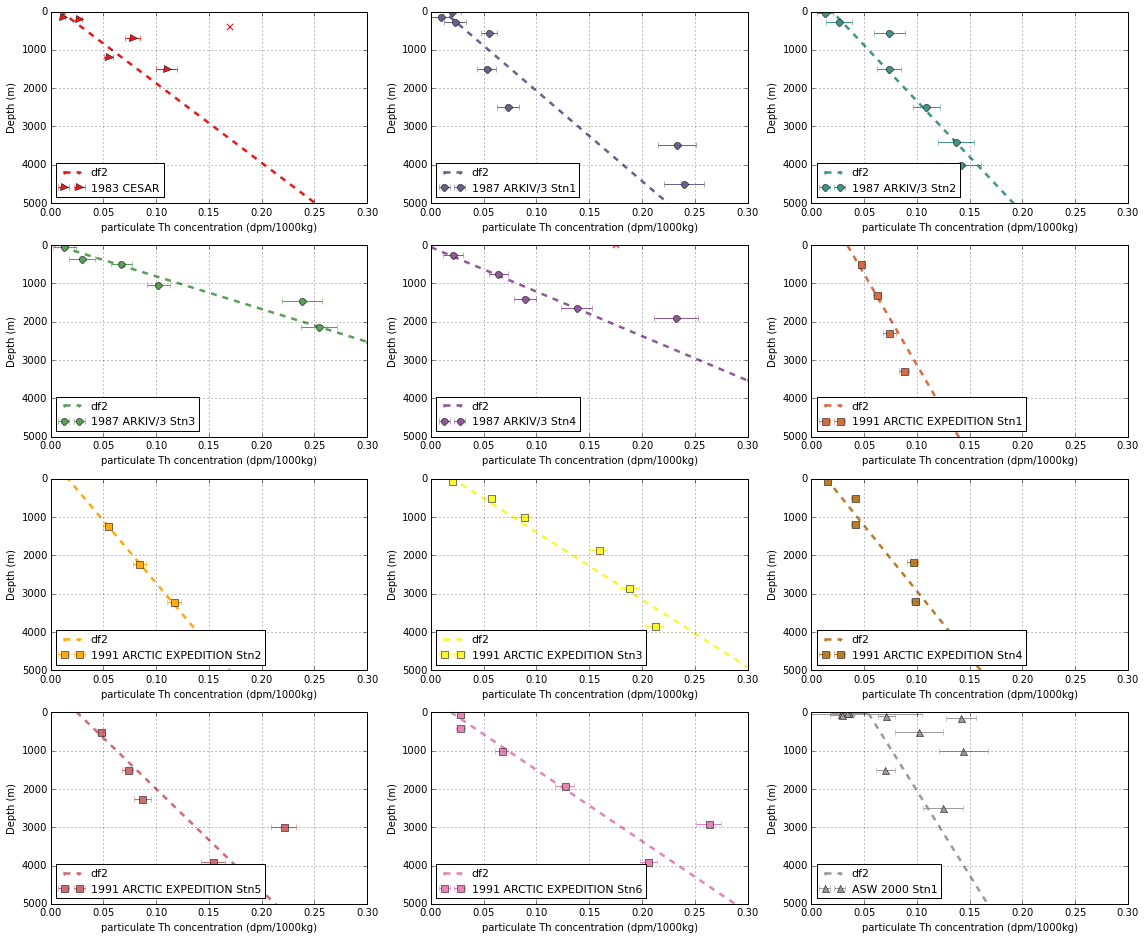

In [416]:
#ax = plt.figure(1,figsize=(10,7))
for j in range(file_num):

    data=pd.read_csv(nc_filename[j])

    y0= data['depth'];
    name= data['name'][0];
    x0=data['230Th part.'];
    lon = data['long.'];
    lat = data['lat.'];
    err0 =data['Th_part_err']
    x=np.ma.masked_where(x0<=0,x0)
    y=np.ma.masked_where(x0<=0,y0)
    err=np.ma.masked_where(x0<=0,err0)
    x=x.compressed()
    y=y.compressed()
    err=err.compressed()
    
    if j==0:
        x=np.delete(x,[2],0)
        y=np.delete(y,[2],0)
        err=np.delete(err,[2],0)
    if j==4:
        x=np.delete(x,0,0)
        y=np.delete(y,0,0)
        err=np.delete(err,0,0)
    
    y2 = sm.add_constant(y,prepend=False)
    #y2=y
    res_wls = sm.WLS(x, y2, weights=1./err**2).fit()
    
    ftest=sm.WLS(x, y, weights=1./err**2).fit()


    model1=np.sum(ftest.resid**2/err**2)
    model2=np.sum(res_wls.resid**2/err**2)
    rss1[j]=model1
    rss2[j]=model2
    
    p1 = 1
    p2 = 2
    n = len(x)
    #F = (ftest.mse_resid - res_wls.mse_resid)/(res_wls.mse_resid) *(n-p2)/(p2-p1)
    F = ( model1 - model2)/model2*(n-p2)/(p2-p1)
    p = 1.0 - scist.cdf(F,p2-p1,n-p2)
    
    WLS_err1[j,:] = res_wls.bse[0]
    WLS_coef1[j,:] = res_wls.params[0]
    WLS_coefc[j,:]=res_wls.params[1]
    WLS_errc[j,:] = res_wls.bse[1]
    sinking_rate[j,:]=0.0267/res_wls.params[0]
    #err1[j]=(WLS_err1[j,:]/WLS_coef1[j,:])*1/WLS_coef1[j,:]*0.0267
    pre_err1=0.0267/(WLS_coef1[j,:]-WLS_err1[j,:])
    err1[j]=pre_err1-sinking_rate[j,:]
    
    
    print ('')
    print (name)
    print ('df:(%s,%s)'%(p2-p1,n-p2))
    print ('F ratio: %s'%F)
    print ('ftest:%s'%p)
    print ('sinking   :%e,error:%e'%(sinking_rate[j,:],err1[j]))

    
    ax = plt.figure(1,figsize=(16,16))
    ax = plt.subplot(5,3,j+1)
    cc=cm.Set1(j*23)#Spectral(j*23)
    #ax.plot([0, 0.3],[0, 0.3]/ftest.params[0], ':',c=cc,linewidth=2.5,label='df1')
    ax.plot([0, 0.3],[0, 0.3]/res_wls.params[0]-res_wls.params[1]/res_wls.params[0], '--.',c=cc,linewidth=2.5,label='df2')
    ax.errorbar(x, y,xerr=err, fmt=marker[j],markersize=7,c=cc,label=name)
    if j==0:
        ax.scatter(x0[3],y0[3],marker='x',c='r',s=40)
    if j==4:
        ax.scatter(x0[0],y0[0],marker='x',c='r',s=40)
    ax.legend(loc=3,fontsize=11)
    
    ax.set_ylim([0, 5000])
    ax.set_xlim([0, 0.3])
#    if j+1==1 or j+1==5 or j+1==9:
    plt.ylabel('Depth (m)')
#    if j+1==10 or j+1==11: #or j+1==9:
#        plt.xlabel('Particulate Th concentration (dpm/1000kg)')
    plt.xlabel('particulate Th concentration (dpm/1000kg)')
#    plt.ylabel('Depth (m)')
#    if not(j+1==9 or j+1==10 or j+1==11):
#        plt.setp(ax.get_xticklabels(), visible=False)
#    if not (j+1==1 or j+1==5 or j+1==9):
#        plt.setp(ax.get_yticklabels(), visible=False)
    plt.gca().invert_yaxis()
    plt.grid()
    plt.tight_layout()
#    plt.subplots_adjust(wspace=.0000001, hspace=.0000001)
plt.show()

In [417]:
#f_test
p1 = 1
p2 = 2
n = 75
F = (sum(rss1) - sum(rss2))/(sum(rss2)) *(n-p2*12)/(p2*10-p1*12)
p = 1.0 - scist.cdf(F,p2-p1,n-p2)
print ('df:(%s,%s)'%((p2-p1)*12,(n-p2*12)))
print ('F ratio: %s'%F)
print ('ftest:%s'%p)

df:(12,51)
F ratio: 10.3496664558
ftest:0.00193164225116


                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.936
Model:                            WLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     161.3
Date:                Wed, 09 Mar 2016   Prob (F-statistic):           6.47e-08
Time:                        13:10:24   Log-Likelihood:                -18.646
No. Observations:                  12   AIC:                             39.29
Df Residuals:                      11   BIC:                             39.78
Df Model:                           1                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.0002   1.36e-05     12.702      0.000         0.000     0.000
Omnibus:                        3.986   Durbin-Watso

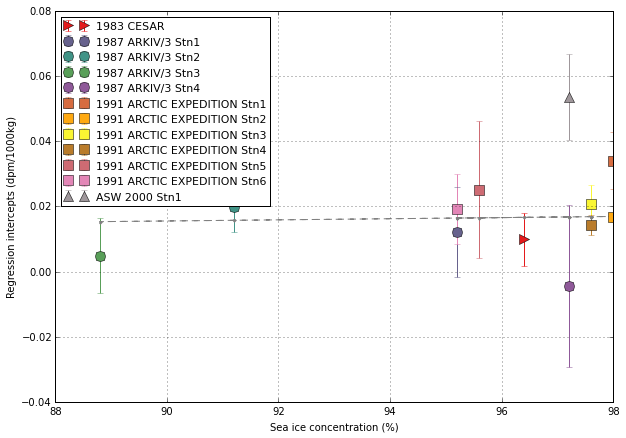

In [418]:
#test the intercepts(dust) with sea ice concentration
i= np.array([96.4,95.2,91.2,88.8,97.2,98,98,97.6,97.6,95.6,95.2,97.2])

dust = sm.WLS(WLS_coefc,i,weights=1./WLS_errc**2).fit() 

fig, ax = plt.subplots(1,figsize=(10,7))
ax.plot(i,dust.fittedvalues, '--.',color='grey')
for j in range(file_num):
    data=pd.read_csv(nc_filename[j])
    name= data['name'][0];
    errorbar(i[j],WLS_coefc[j],yerr=WLS_errc[j],fmt=marker[j],markersize=10,c=cm.Set1(j*23),label=name)

ax.legend(loc=0, fontsize=11)#,bbox_to_anchor=(1.45,1))
plt.xlabel('Sea ice concentration (%)')
plt.ylabel('Regression intercepts (dpm/1000kg)')
print dust.summary()
plt.grid()
plt.show()

#fitting the diss. Th

####(1) Change into fit Q-C{1}K{-1}-K{-1}Qz/S

In [419]:
WLS_err2=np.empty([file_num,1])
Kvalue=np.empty([file_num,1])
Jvalue=np.empty([file_num,1])
WLS_coef2=np.empty([file_num,1])
Kapa=np.empty([file_num,1])


1983 CESAR
F ratio: 28.3333491149
df:(1,4)
ftest:0.00599381027688
K   :[ 0.06592102],err:[ 0.04251334]
J   :[ 1.11980341],err:[ 1.50634536]

1987 ARKIV/3 Stn1
F ratio: 25.1463018115
df:(1,4)
ftest:0.00741350276468
K   :[ 0.1654963],err:[ 0.09080588]
J   :[ 0.6348583],err:[ 0.62497249]

1987 ARKIV/3 Stn2
F ratio: 5.92755729554
df:(1,3)
ftest:0.0929424244062
K   :[ 0.13525824],err:[ 0.06586654]
J   :[ 0.89860467],err:[ 0.68420859]

1987 ARKIV/3 Stn3
F ratio: 33.016864076
df:(1,4)
ftest:0.00454682706481
K   :[ 0.3801561],err:[ 0.14262473]
J   :[ 0.47625494],err:[ 0.31386887]

1987 ARKIV/3 Stn4
F ratio: 19.8727076299
df:(1,4)
ftest:0.0111785390507
K   :[ 0.39417757],err:[ 0.33027194]
J   :[ 0.59362055],err:[ 0.77504239]

1991 ARCTIC EXPEDITION Stn1
F ratio: 8.14183938216
df:(1,3)
ftest:0.0649280055878
K   :[ 0.06824489],err:[ 0.02741948]
J   :[ 0.26706387],err:[ 0.28333878]

1991 ARCTIC EXPEDITION Stn2
F ratio: 4.23338721961
df:(1,2)
ftest:0.175896148077
K   :[ 0.09575117],err:[ 0.0397575

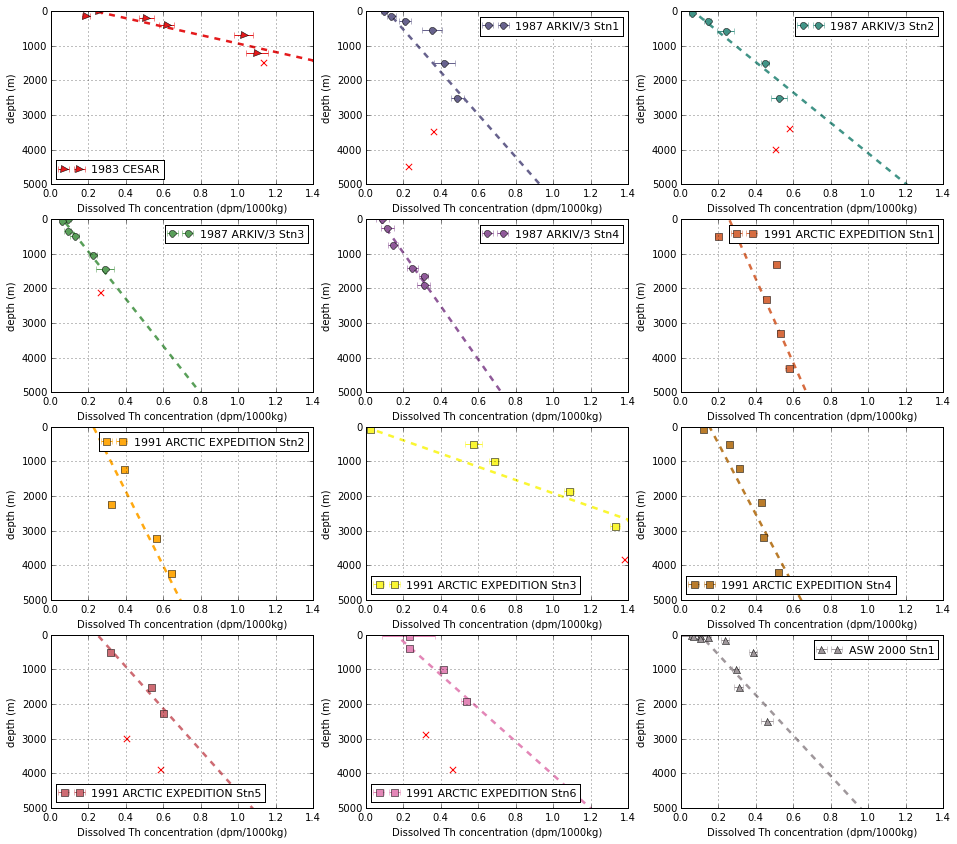

In [420]:
for j in range(file_num):
    data=pd.read_csv(nc_filename[j])
    
    y0= data['depth'];
    x0= data['230Th diss.'];
    name= data['name'][0];
    lon = data['long.'];
    lat = data['lat.'];
    err0 =data['Th_diss_err']

    x=np.ma.masked_where(x0<=0,x0)
    y=np.ma.masked_where(x0<=0,y0)
    err=np.ma.masked_where(x0<=0,err0)
    
    x=x.compressed()
    y=y.compressed()
    err=err.compressed()

    if j==0 or j==3 or j==7:
        x=np.delete(x,-1,0)
        y=np.delete(y,-1,0)
        err=np.delete(err,-1,0)
    if j==1 or j==2 or j==10 or j==9:
        index=[len(x)-2,len(x)-1]
        x=np.delete(x,index)
        y=np.delete(y,index)
        err=np.delete(err,index)
        
    y2=y
    
    #fit: model2
    y3 = sm.add_constant(y2,prepend=False)  
    res_wls2 = sm.WLS(x,y3, weights=1./err**2).fit() 
    
    Q=0.0267
    a=res_wls2.params[0]
    b=res_wls2.params[1]
    
    Kvalue[j]=Q**2/(b*Q+WLS_coefc[j,:]*a*sinking_rate[j,:])
    
    #err2[j]=((res_wls2.bse[1]/b)**2+(WLS_errc[j,:]/WLS_coefc[j,:])**2+(err1[j]/sinking_rate[j])**2)**0.5*Kvalue[j]
    
    pre=Q**2/((b*Q+WLS_coefc[j,:]*a*sinking_rate[j,:])**2)
    pre_err2=abs(Q*pre*res_wls2.bse[1])+abs(a*WLS_coefc[j,:]*pre*err1[j])+abs(a*sinking_rate[j,:]*WLS_errc[j,:]*pre)
    err2[j]=pre_err2
    
    Jvalue[j]=a*sinking_rate[j,:]/Q*Kvalue[j]

    err3=abs(Kvalue[j]*sinking_rate[j,:]/Q*res_wls2.bse[0])
    err3=err3+abs(a*sinking_rate[j,:]/Q*err2[j])+abs(a*Kvalue[j]/Q*err1[j])



    
    WLS_coef2[j]=res_wls2.params[0]
    WLS_err2[j]=res_wls2.bse[0]
    #err2=res_wls2.bse[0]/res_wls2.params[0]*Kvalue[j]
    
    #fit: model1
    ftest=sm.WLS(x, y2, weights=1./err**2).fit()     
    
    #calculate weighted resid. sum
    resid1=ftest.resid**2/err**2                
    model1=np.sum(resid1)

    resid2=res_wls2.resid**2/err**2
    model2=np.sum(resid2)
    
    #prepare data to recalculate the whole profile later
    rss1[j]=model1                
    rss2[j]=model2

    #f_test
    p1 = 1
    p2 = 2
    n = len(x)
    F = (model1 - model2)/model2*(n-p2)/(p2-p1)
    p = 1.0 - scist.cdf(F,p2-p1,n-p2)
    
    #print related data
    print ('')
    print (name)
    print ('F ratio: %s'%F)
    print ('df:(%s,%s)'%(p2-p1,n-p2))
    print ('ftest:%s'%p)
    
    print ('K   :%s,err:%s'%(Kvalue[j,:],err2[j,:]))
    print ('J   :%s,err:%s'%(Jvalue[j,:],err3))
    
    if F<=0:
        print ('df1 weighted resid. sum:%s'%model1)
        print ('df2 weighted resid. sum:%s'%model2)
        print ('df1:%s'%resid1)
        print ('df2:%s'%resid2)

    
    #plot
    ax = plt.figure(1,figsize=(16,18))
    ax = plt.subplot(5,3,j+1)
    cc=cm.Set1(j*23)
    #ax.plot(y2, res_wls2.fittedvalues, '--.',c=cc,linewidth=1.5,label='df2')
    ax.plot([0, 1.4],[0, 1.4]/res_wls2.params[0]-res_wls2.params[1]/res_wls2.params[0], '--.',c=cc,linewidth=2.5)
    if j==0 or j==3 or j==7 or j==1 or j==2 or j==10 or j==9:
        ax.scatter(x0[(len(x0)-1)],y0[(len(x0)-1)],marker='x',c='r',s=40)
    if j==1 or j==2 or j==10 or j==9:
        ax.scatter(x0[(len(x0)-2)],y0[(len(x0)-2)],marker='x',c='r',s=40)
    ax.errorbar(x,y2,xerr=err, fmt=marker[j],markersize=7,c=cc,label=name)

    ax.legend(loc=0,fontsize=11)

    ax.set_xlim([0, 1.40])
    ax.set_ylim([0, 5000])
#    if j+1==5: #or j+1==5 or j+1==9:
    plt.xlabel('Dissolved Th concentration (dpm/1000kg)')
#    if j+1==10 or j+1==11: #or j+1==9:
    plt.ylabel('depth (m)')#'$Q-C_{1}K_{-1}-K_{-1}Qz/S$ (/yr)')
#    if not(j+1==8 or j+1==9 or j+1==10 or j+1==11):
#        plt.setp(ax.get_xticklabels(), visible=False)
#    if not (j+1==1 or j+1==5 or j+1==9):
#        plt.setp(ax.get_yticklabels(), visible=False)
    plt.grid()
    plt.gca().invert_yaxis()
#    plt.subplots_adjust(wspace=.0000001, hspace=.0000001)   
plt.show()

In [421]:
p1 = 1
p2 = 2
n = 75
F = (sum(rss1) - sum(rss2))/(sum(rss2)) *(n-p2*12)/(p2*10-p1*12)
p = 1.0 - scist.cdf(F,p2-p1,n-p2)
print ('df:(%s,%s)'%((p2-p1)*12,(n-p2*12)))
print ('F ratio: %s'%F)
print ('ftest:%s'%p)

df:(12,51)
F ratio: 23.0688161196
ftest:8.10685886987e-06


# WLS: sinking rate and the ice concentration

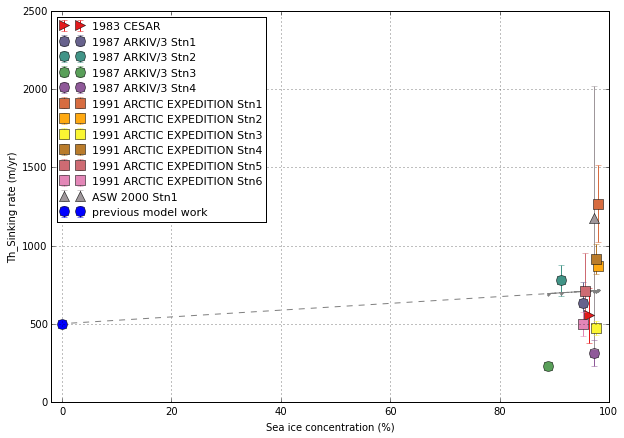

In [422]:
i=np.empty([file_num,1])
#for j in range(11):
#    data=pd.read_csv(nc_filename[j])
#    i[j,:]= data['ice'][0];
i= np.array([96.4,95.2,91.2,88.8,97.2,98,98,97.6,97.6,95.6,95.2,97.2]) #'remember to add i'
#marker=      ['o','o','o','o',   '^','s','s','s','s','s', 's','D','D','>']
    
err1=(WLS_err1/WLS_coef1)*1/WLS_coef1*0.0267
#((WLS_err1/WLS_coef1)**2)**(0.5)
sinking_rate=numpy.append(sinking_rate,500)
i=numpy.append(i,0)
err1=numpy.append(err1,0.0001)
i2 = sm.add_constant(i,prepend=False)
mod_wls3 = sm.WLS(sinking_rate,i2,weights=1./err1**2) #Is it the real error?
res_wls3 = mod_wls3.fit()

fig, ax = plt.subplots(1,figsize=(10,7))
ax.plot(i, res_wls3.fittedvalues, '--.',color='grey')
for j in range(file_num):
    data=pd.read_csv(nc_filename[j])
    name= data['name'][0];
    errorbar(i[j],sinking_rate[j],yerr=err1[j],fmt=marker[j],markersize=10,c=cm.Set1(j*23),label=name)

ax.errorbar(i[-1],sinking_rate[-1], yerr=err1[-1], fmt='o',markersize=10,c='blue',label='previous model work')
ax.legend(loc=0, fontsize=11)#,bbox_to_anchor=(1.45,1))
plt.xlabel('Sea ice concentration (%)')
plt.ylabel('Th_Sinking rate (m/yr)')

#ax.set_ylim([0, 5000])
ax.set_xlim([-2, 100])
plt.grid()
plt.show()

In [423]:
print res_wls3.summary()

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.393
Model:                            WLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     7.130
Date:                Wed, 09 Mar 2016   Prob (F-statistic):             0.0218
Time:                        13:10:26   Log-Likelihood:                -41.752
No. Observations:                  13   AIC:                             87.50
Df Residuals:                      11   BIC:                             88.63
Df Model:                           1                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             2.1673      0.812      2.670      0.022         0.381     3.954
const        500.0000      0.001   7.66e+05      0.0

In [424]:
from statsmodels.formula.api import wls
from scipy.stats import f as scist
data = pd.DataFrame({'sinking_rate':sinking_rate, 'i3': i})
res_wls5 = wls('sinking_rate~i3', data,weights=1./(err1**2)).fit()

In [425]:
a=average(sinking_rate)
#print a
#print sinking_rate

In [426]:
rss=(sinking_rate-a)**2/err1**2
rss_sum=sum(rss)
p1 = 1
p2 = 2
n = file_num
F = (rss_sum - np.sum(res_wls5.resid**2/err1**2))/(np.sum(res_wls5.resid**2/err1**2)) *(n-p2)/(p2-p1)
p = 1.0 - scist.cdf(F,p2-p1,n-p2)
print ('F ratio: %s'%F)
print ('df:(%s,%s)'%((p2-p1),(n-p2)))
print ('ftest:%s'%p)

F ratio: 73482448650.8
df:(1,10)
ftest:1.11022302463e-16


#  K value and the ice concentration

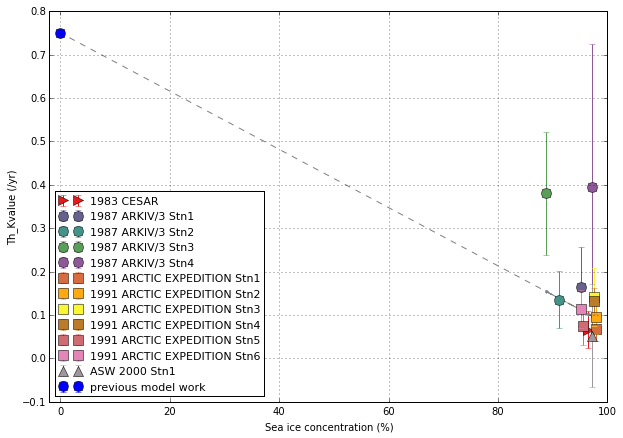

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.996
Model:                            WLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     3126.
Date:                Wed, 09 Mar 2016   Prob (F-statistic):           7.40e-15
Time:                        13:10:26   Log-Likelihood:                -15.357
No. Observations:                  13   AIC:                             34.71
Df Residuals:                      11   BIC:                             35.84
Df Model:                           1                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            -0.0067      0.000    -55.909      0.000        -0.007    -0.006
const          0.7500   8.57e-05   8749.666      0.0

In [427]:
#err2=WLS_err2/WLS_coef2*Kvalue
#pre_err2= (((WLS_errc/WLS_coefc)**2+(WLS_err2/WLS_coef2)**2)*WLS_coefc*WLS_coef2)**(0.5)
#err2=((WLS_err2)**2+ (pre_err2)**2)**0.5/Q

Kvalue=numpy.append(Kvalue,0.75)
err2=numpy.append(err2,0.0001)

mod_wls4 = sm.WLS(Kvalue, i2, weights=1./err2**2)
res_wls4 = mod_wls4.fit()

fig, ax = plt.subplots(1,figsize=(10,7))
ax.plot(i, res_wls4.fittedvalues,  '--.',color='grey')
for j in range(file_num):
    data=pd.read_csv(nc_filename[j])
    name= data['name'][0];
    errorbar(i[j],Kvalue[j],yerr=err2[j],fmt=marker[j],markersize=10,c=cm.Set1(j*23),label=name)
    
errorbar(i[-1],Kvalue[-1], yerr=err2[-1], fmt='o',markersize=10,c='blue',label='previous model work')
ax.legend(loc=0,fontsize=11)
plt.xlabel('Sea ice concentration (%)')
plt.ylabel('Th_Kvalue (/yr)')
ax.set_xlim([-2, 100])
plt.grid()
plt.show()
print res_wls4.summary() 

[  2.48763555   1.30126874  99.917209  ]


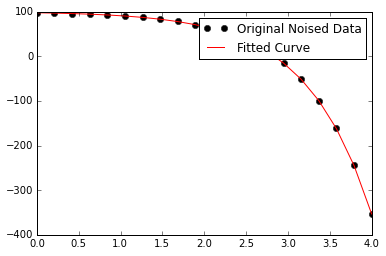

In [428]:
#test curve fitting function
def func(x, a, b, c):
    return -a * np.exp(b * (x-0)) + c

x = np.linspace(0,4,20)
y = func(x, 2.5, 1.3, 100)
yn = y + 0.2*np.random.normal(size=len(x))

popt, pcov = curve_fit(func, x, yn)
print popt
plt.figure()
plt.plot(x, yn, 'ko', label="Original Noised Data")
plt.plot(x, func(x, *popt), 'r-', label="Fitted Curve")
plt.legend();plt.show()

In [431]:
#rearrage data. to make it increase 
min=0;i3=[]
k3=[];e3=[]
i22=np.copy(i2[:,0])

for j in range (len(i22)):
    k=np.where(i22 == i22.min())[0][0]
    i3.append(i22[k])
    e3.append(err2[k])
    i22[k]=1000
    k3.append(Kvalue[k])    

i3=np.array(i3);k3=np.array(k3);e3=np.array(e3)

y(100):0.0482761672293


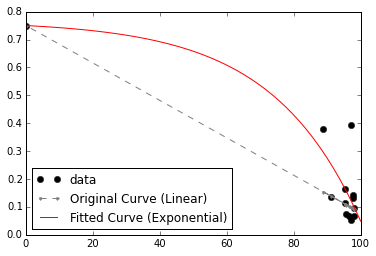

In [432]:
def func(x, a, b, c):
    return -a * np.exp(-b * (100-x)) + c


popt, pcov = curve_fit(func,i3,k3,sigma=e3/k3)

plt.figure()
plt.plot(i3, k3, 'ko', label="data")
#errorbar(100-i3, k3, yerr=e3, fmt='o',markersize=3,c='black',label='previous model work')
plt.plot(i, res_wls4.fittedvalues,  '--.',c='grey',label='Original Curve (Linear)')
x = np.linspace(0,100,50)
plt.plot(x, func(x, *popt), 'r-', label="Fitted Curve (Exponential)")

print 'y(100):%s'%func(100, *popt)
plt.xlim([0,100])
plt.legend(loc=3)
plt.show()

y(100):0.0100559342189


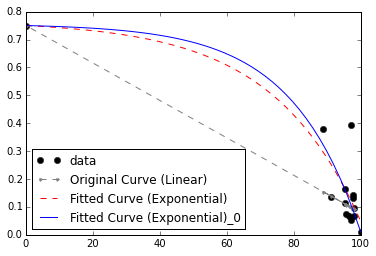

In [452]:
min=0;i3=[100]
k3=[0.01];e3=[0.01/100]
i22=np.copy(i2[:,0])

for j in range (len(i22)):
    k=np.where(i22 == i22.min())[0][0]
    i3.append(i22[k])
    e3.append(err2[k])
    i22[k]=1000
    k3.append(Kvalue[k])    

i3=np.array(i3);k3=np.array(k3);e3=np.array(e3)


popt2, pcov2 = curve_fit(func,i3,k3,sigma=e3/k3)
plt.figure()
plt.plot(i3, k3, 'ko', label="data")
#errorbar(i3, k3, yerr=e3, fmt='o',markersize=3,c='black',label='previous model work')
plt.plot(i, res_wls4.fittedvalues,  '--.',c='grey',label='Original Curve (Linear)')
x = np.linspace(0,100,50)
plt.plot(x, func(x, *popt), 'r--', label="Fitted Curve (Exponential)")
plt.plot(x, func(x, *popt2), 'b-', label="Fitted Curve (Exponential)_0")

print 'y(100):%s'%func(100, *popt2)
plt.xlim([0,100])
plt.legend(loc=3)
plt.show()

y(100):0.0482761672293


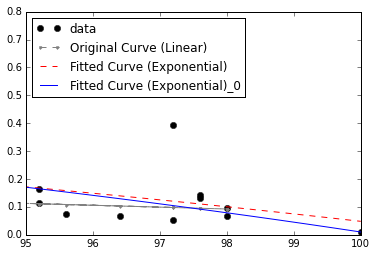

In [447]:
plt.figure()
plt.plot(i3, k3, 'ko', label="data")
plt.plot(i, res_wls4.fittedvalues,  '--.',c='grey',label='Original Curve (Linear)')
x = np.linspace(80,100,50)
plt.plot(x, func(x, *popt), 'r--', label="Fitted Curve (Exponential)")
plt.plot(x, func(x, *popt2), 'b-', label="Fitted Curve (Exponential)_0")
print 'y(100):%s'%func(100, *popt)
plt.xlim([95,100])
plt.legend(loc=2)
plt.show()

#  J value and the ice concentration

In [16]:
err2=WLS_err2/WLS_coef2*Jvalue

#Jvalue=numpy.append(Jvalue,1.6)
#err2=numpy.append(err2,0.001)
i=np.delete(i,-1)
i2 = sm.add_constant(i,prepend=False)
mod_wls4 = sm.WLS(Jvalue, i2, weights=1./err2**2).fit()

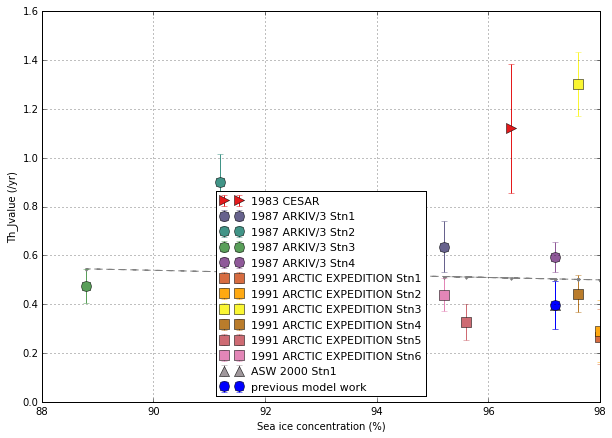

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.004
Model:                            WLS   Adj. R-squared:                 -0.095
Method:                 Least Squares   F-statistic:                   0.04498
Date:                Wed, 23 Sep 2015   Prob (F-statistic):              0.836
Time:                        21:09:40   Log-Likelihood:                -27.857
No. Observations:                  12   AIC:                             59.71
Df Residuals:                      10   BIC:                             60.68
Df Model:                           1                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            -0.0049      0.023     -0.212      0.836        -0.056     0.047
const          0.9802      2.206      0.444      0.6

In [17]:
fig, ax = plt.subplots(1,figsize=(10,7))
ax.plot(i, mod_wls4.fittedvalues,  '--.',color='grey')
for j in range(file_num):
    data=pd.read_csv(nc_filename[j])
    name= data['name'][0];
    errorbar(i[j],Jvalue[j],yerr=err2[j],fmt=marker[j],markersize=10,c=cm.Set1(j*23),label=name)
    
errorbar(i[-1],Jvalue[-1], yerr=err2[-1], fmt='o',markersize=10,c='blue',label='previous model work')
ax.legend(loc=0,fontsize=11)
plt.xlabel('Sea ice concentration (%)')
plt.ylabel('Th_Jvalue (/yr)')
#ax.set_xlim([-2, 100])
plt.grid()
plt.show()
print mod_wls4.summary()

In [18]:
from pykrige.ok import OrdinaryKriging
x_interp=np.empty([file_num])
y_interp=np.empty([file_num])

nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/findk/All_Arctic-data/WLS/Th/*.csv'))
for j in range(file_num):
    data=pd.read_csv(nc_filename[j])
    lon = data['long.'];
    name= data['name'][0];
    lat = data['lat.'];
    m = Basemap(projection='npstere',boundinglat=65,lon_0=0,resolution='l')
    x,y = m(lon.values,lat.values)
    x_interp[j]=x[0]
    y_interp[j]=y[0]

Plotting Enabled

Adjusting data for anisotropy...
Initializing variogram model...
Using 'linear' Variogram Model
Slope: 9.30735074685e-08
Nugget: 0.0126000310366 



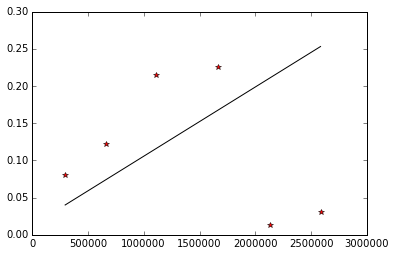

Calculating statistics on variogram model fit...
Q1 = 0.739749489667
Q2 = 3.58521081339
cR = 0.235742346895 

Executing Ordinary Kriging...



In [19]:
import netCDF4 as nc
OK = OrdinaryKriging(x_interp,y_interp,Jvalue, variogram_model='linear', verbose=True, enable_plotting=True)
#OK.update_variogram_model('linear',nlags=100,anisotropy_angle=0)
coordinate_name=glob.glob('/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myANHA/EXP00/*coor*.nc')
coordinate_obj=nc.Dataset(coordinate_name[0])
nav_lon=coordinate_obj.variables['nav_lon'][:]
nav_lat=coordinate_obj.variables['nav_lat'][:]
m = Basemap(projection='npstere',boundinglat=65,lon_0=0,resolution='l')
x_lon,y_lat = m(nav_lon, nav_lat)

J_interp, ss = OK.execute('points',x_lon, y_lat)
J_interp=J_interp.reshape(nav_lon.shape)

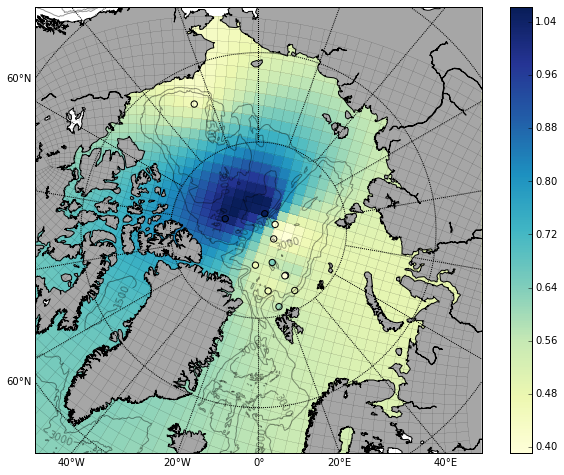

In [21]:
fig=plt.figure(figsize=(10, 10)); 
ax = fig.add_subplot()

# create Basemap instance.
m = Basemap(projection='npstere',boundinglat=65,lon_0=0,resolution='l')
m.drawcoastlines()
m.fillcontinents(color = '0.65')
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])


CS = m.pcolor(x_lon[::10,::10],y_lat[::10,::10],J_interp[::10,::10],cmap=plt.cm.YlGnBu)#boundary+120
CBar = plt.colorbar(CS, shrink=0.8)
#for j in range(len(y_interp)):
cmm = plt.cm.get_cmap('YlGnBu')
m.scatter(x_interp,y_interp,c=Jvalue,vmin=np.min(J_interp),vmax=np.max(J_interp),cmap=cmm,s=40)
    
plt.plot(x_lon[::10,::10],y_lat[::10,::10],x_lon[::10,::10].T,y_lat[::10,::10].T,color='black',linewidth=0.1)


url = 'http://ferret.pmel.noaa.gov/thredds/dodsC/data/PMEL/etopo5.nc'
etopodata = Dataset(url)
topoin = -etopodata.variables['ROSE'][:]
topoin_ma=np.ma.masked_where(topoin<=0,topoin)
lons = etopodata.variables['ETOPO05_X'][:]
lats = etopodata.variables['ETOPO05_Y'][:]
gridx, gridy = np.meshgrid(lons, lats)
xs,ys = m(gridx,gridy)  

m = m.contour(xs,ys,topoin_ma,linewidth=0.075,colors='black',alpha=0.4)
plt.clabel(m, fontsize=10, inline=1,fmt = '%1.0f')

#plt.title('$k_{-1}$ Distribution in the Arctic')
plt.legend(loc=1,fontsize=11)

plt.show()

In [22]:
lat = nav_lat
lon = nav_lon
print lat.shape
xmax = lat.shape[1]
ymax = lat.shape[0]
depthtmax = 31

nemo = nc.Dataset('/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myANHA/EXP00/data_desorption_rate.nc', 'w')
nemo.description = 'desorption rate' 

# dimensions
nemo.createDimension('x', xmax)
nemo.createDimension('y', ymax)
nemo.createDimension('time_counter', None)

# variables
# latitude and longitude
nav_lat = nemo.createVariable('nav_lat','float32',('y','x'),zlib=True)
nav_lat = lat
x = nemo.createVariable('nav_lon','float32',('y','x'),zlib=True)
nav_lon = lon
# time
time_counter = nemo.createVariable('time_counter', 'float32', ('time_counter'),zlib=True)
time_counter.units = 'non-dim'
time_counter[0] = 1
# runoff
Pa = nemo.createVariable('desorption_rate', 'float32', ('time_counter','y','x'), zlib=True)
Pa._units = 'arbitrary'
Pa[0,:,:]=J_interp[:,:]
nemo.close()

(800, 544)


In [24]:
#test nc file
import glob,csv
nc_filename=glob.glob('/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myANHA/EXP00/data_desorption_rate.nc')
print("found *.nc file: \n{}".format(nc_filename))

ptrc=nc.Dataset(nc_filename[0])
Pa_diss=ptrc.variables['desorption_rate'][:]
print Pa_diss[:,:,:]#.shape#-J_interp[0,0:10]

found *.nc file: 
['/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myANHA/EXP00/data_desorption_rate.nc']
[[[ 0.53385711  0.53429401  0.53472966 ...,  0.5029335   0.50256312
    0.50219274]
  [ 0.53392178  0.53435898  0.53479493 ...,  0.50293833  0.50256807
    0.5021978 ]
  [ 0.53398669  0.53442425  0.53486049 ...,  0.50294322  0.50257301
    0.50220293]
  ..., 
  [ 0.55490452  0.55421519  0.55352479 ...,  0.46846962  0.46837357
    0.46827909]
  [ 0.55462122  0.55393016  0.55323797 ...,  0.46833849  0.46824387
    0.46815076]
  [ 0.55433917  0.55364633  0.55295241 ...,  0.46820709  0.46811387
    0.46802217]]]


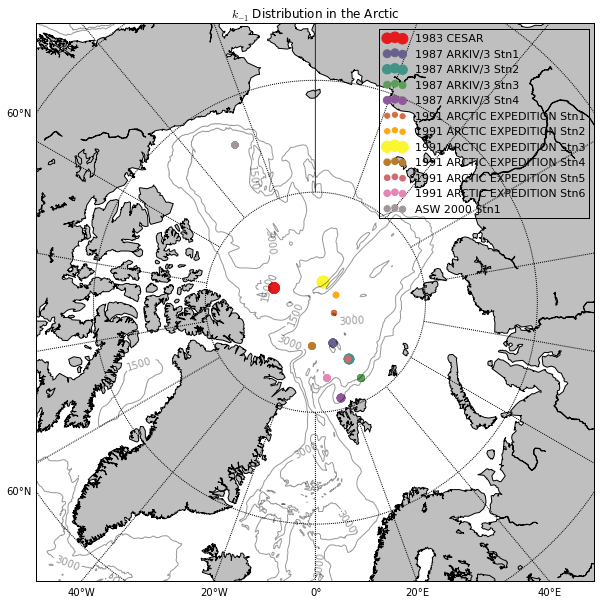

In [22]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()

# create Basemap instance.
m = Basemap(projection='npstere',boundinglat=65,lon_0=0,resolution='l')
m.drawcoastlines()
m.fillcontinents(color = '0.75')
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])

nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/findk/All_Arctic-data/WLS/Th/*.csv'))
for j in range(file_num):
    data=pd.read_csv(nc_filename[j])
    lon = data['long.'];
    name= data['name'][0];
    lat = data['lat.'];
    x,y = m(lon.values,lat.values)
    x_interp[j]=x[0]
    y_interp[j]=y[0]
    m.scatter(x,y,color=cm.Set1(j*23),s=Jvalue[j]*100,label=name)
url = 'http://ferret.pmel.noaa.gov/thredds/dodsC/data/PMEL/etopo5.nc'
etopodata = Dataset(url)
topoin = -etopodata.variables['ROSE'][:]
topoin_ma=np.ma.masked_where(topoin<=0,topoin)
lons = etopodata.variables['ETOPO05_X'][:]
lats = etopodata.variables['ETOPO05_Y'][:]
gridx, gridy = np.meshgrid(lons, lats)
xs,ys = m(gridx,gridy)  

m = m.contour(xs,ys,topoin_ma,linewidth=0.075,colors='black',alpha=0.4)
plt.clabel(m, fontsize=10, inline=1,fmt = '%1.0f')

plt.title('$k_{-1}$ Distribution in the Arctic')
plt.legend(loc=1,fontsize=11)

plt.show()

# map

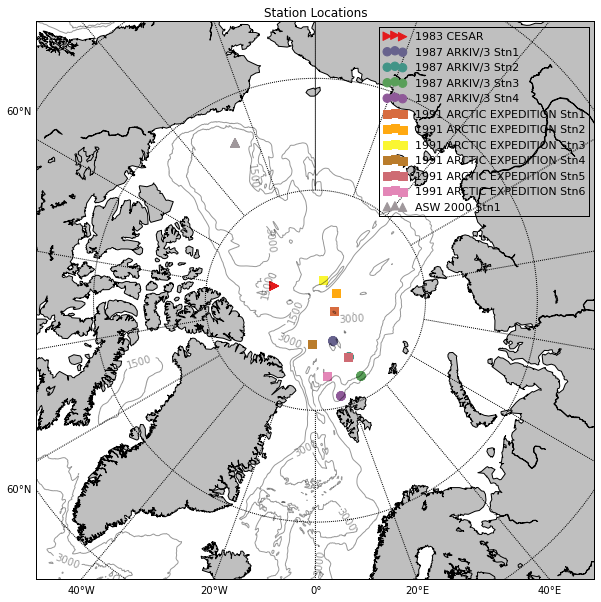

In [23]:
import matplotlib.cm as cm

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()

# create Basemap instance.
m = Basemap(projection='npstere',boundinglat=65,lon_0=0,resolution='l')
m.drawcoastlines()
m.fillcontinents(color = '0.75')
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])

nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/findk/All_Arctic-data/WLS/Th/*.csv'))
for j in range(file_num):
    data=pd.read_csv(nc_filename[j])
    lon = data['long.'];
    name= data['name'][0];
    lat = data['lat.'];
    x,y = m(lon.values,lat.values)
    m.scatter(x,y,color=cm.Set1(j*23),marker=marker[j],s=70,label=name)


url = 'http://ferret.pmel.noaa.gov/thredds/dodsC/data/PMEL/etopo5.nc'
etopodata = Dataset(url)
topoin = -etopodata.variables['ROSE'][:]
topoin_ma=np.ma.masked_where(topoin<=0,topoin)
lons = etopodata.variables['ETOPO05_X'][:]
lats = etopodata.variables['ETOPO05_Y'][:]
gridx, gridy = np.meshgrid(lons, lats)
xs,ys = m(gridx,gridy)  

m = m.contour(xs,ys,topoin_ma,linewidth=0.075,colors='black',alpha=0.4)
plt.clabel(m, fontsize=10, inline=1,fmt = '%1.0f')

plt.title("Station Locations")
plt.legend(loc=1,fontsize=11)

plt.show()